# 🎓 Bài tập giữa kỳ - Phân tích và Ứng dụng Machine Learning trên dữ liệu YouTube Trending
**Họ tên:** Nguyễn Trương Cao Sơn  
**MSSV:** 3123580040  
**Lớp:** DDU1231  
**GV hướng dẫn:** Vũ Ngọc Thanh Sang

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving top-1000-trending-youtube-videos.csv to top-1000-trending-youtube-videos (5).csv


#About Dataset
##Description

Bộ dữ liệu này chứa thông tin chi tiết về 1000 kênh YouTube thịnh hành nhất tính đến ngày 18 tháng 4 năm 2025.

##Attribute Information

Rank: Xếp hạng của video.

Video: Tên video.

Video Views: Số lượt xem của video.

Like: Số lượt thích.

Dislike: Số lượt không thích.

Category: Thể loại của video.

Published: Năm phát hành.

## 📥 2. Import thư viện và tải dữ liệu


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("top-1000-trending-youtube-videos.csv")
df.head()


,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021


## 📊 3. Khám phá dữ liệu (EDA)


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


,0
rank,0
Video,0
Video views,0
Likes,27
Dislikes,313
Category,180
published,0


📌 Một số phân tích:


*   Top danh mục nội dung phổ biến.
*   Tương quan giữa views, likes, comments.
*   Phân bố lượt xem.


# a. Phân bố lượt xem (histogram và boxplot)

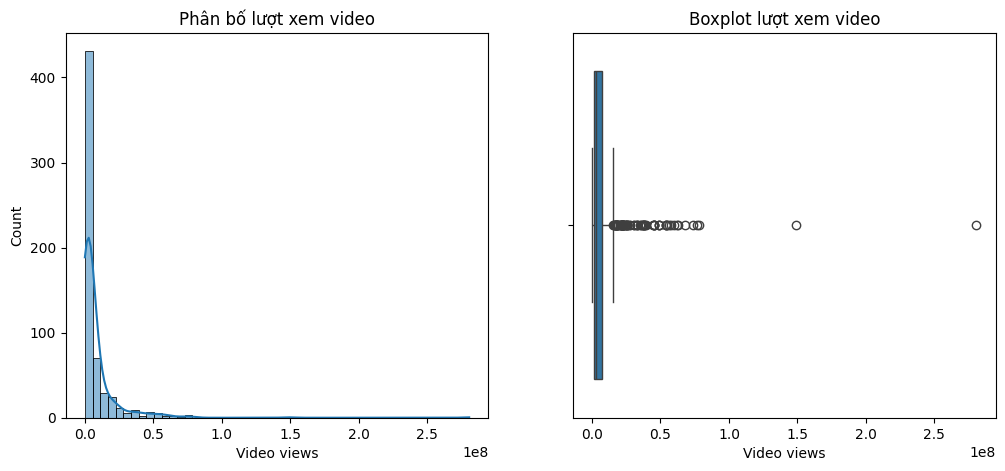

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Video views'], bins=50, kde=True)
plt.title("Phân bố lượt xem video")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Video views'])
plt.title("Boxplot lượt xem video")
plt.show()


# b. Top 10 danh mục phổ biến

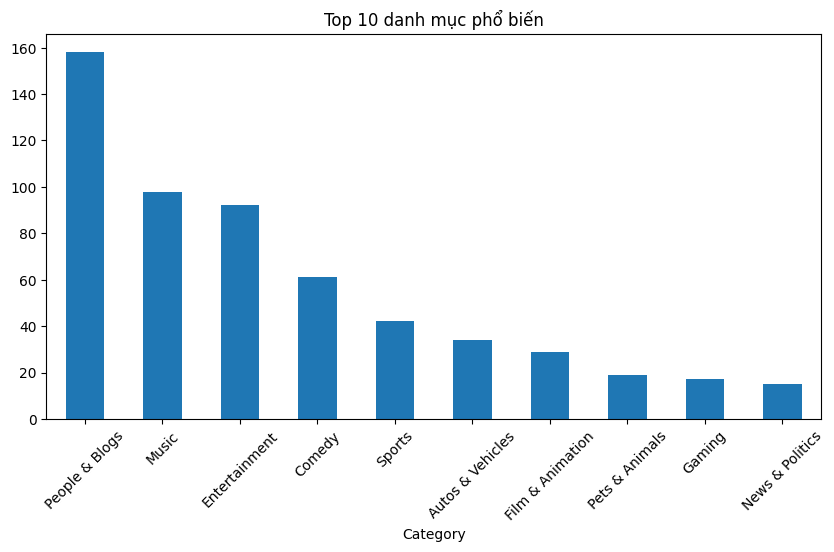

In [ ]:
plt.figure(figsize=(10, 5))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 danh mục phổ biến")
plt.xticks(rotation=45)
plt.show()


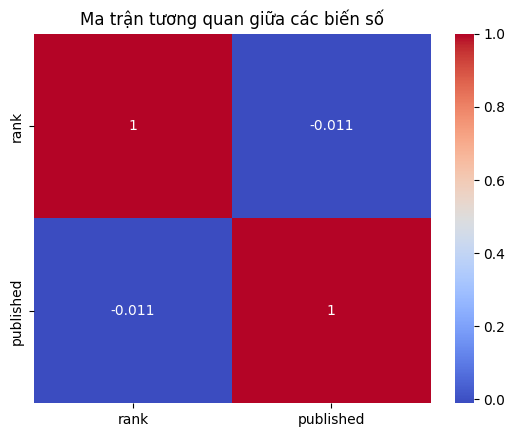

In [ ]:
# Lấy ra chỉ các cột số
numeric_df = df.select_dtypes(include=[np.number])

# Vẽ biểu đồ heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()


## 🧹 4. Tiền xử lý dữ liệu

In [ ]:
df = df.dropna()
le = LabelEncoder()
df['Category_id'] = le.fit_transform(df['Category'])


In [ ]:
print(df.columns)


Index(['rank', 'Video', 'Video views', 'Likes', 'Dislikes', 'Category',
       'published', 'Category_id', 'cluster'],
      dtype='object')


In [ ]:
# Chuyển đổi cột 'Video views' sang kiểu số trước khi so sánh
df['Video views'] = df['Video views'].astype(str).str.replace(',', '')
df['Video views'] = pd.to_numeric(df['Video views'])

# Chọn các đặc trưng phù hợp với tên cột thực tế
X = df[['Likes', 'Dislikes', 'Category_id']]
y_reg = df['Video views']  # Dùng cho hồi quy
y_clf = (df['Video views'] > 1_000_000).astype(int)  # Dùng cho phân loại

## 🔢 5. Hồi quy - Dự đoán lượt xem

# Chia tập và tính toán MSE cụ thể

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_reg)
print("Mean Squared Error (Hồi quy):", round(mse, 2))


Mean Squared Error (Hồi quy): 121594792682514.53


In [ ]:
# Chuyển đổi cột 'Video views' sang kiểu số trước khi so sánh
df['Video views'] = df['Video views'].astype(str).str.replace(',', '')
df['Video views'] = pd.to_numeric(df['Video views'])

df['Likes'] = pd.to_numeric(df['Likes'].astype(str).str.replace(',', ''), errors='coerce')
df['Dislikes'] = pd.to_numeric(df['Dislikes'].astype(str).str.replace(',', ''), errors='coerce')

# Chọn các đặc trưng phù hợp với tên cột thực tế
X = df[['Likes', 'Dislikes', 'Category_id']]
y_reg = df['Video views']  # Dùng cho hồi quy
y_clf = (df['Video views'] > 1_000_000).astype(int)  # Dùng cho phân loại

In [ ]:
# Chuyển đổi cột 'Video views' sang kiểu số trước khi so sánh
df['Video views'] = df['Video views'].astype(str).str.replace(',', '')
df['Video views'] = pd.to_numeric(df['Video views'])

## 🔀 7. Phân cụm - Nhóm video theo tương tác

# Biểu đồ scatter giữa các cụm:

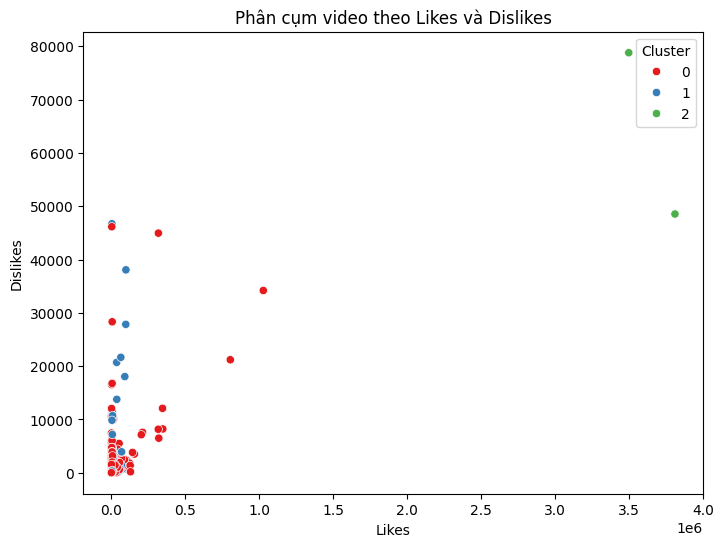

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Likes'], y=X['Dislikes'], hue=df['cluster'], palette='Set1')
plt.title("Phân cụm video theo Likes và Dislikes")
plt.xlabel("Likes")
plt.ylabel("Dislikes")
plt.legend(title='Cluster')
plt.show()


Độ chính xác: 84.3 %


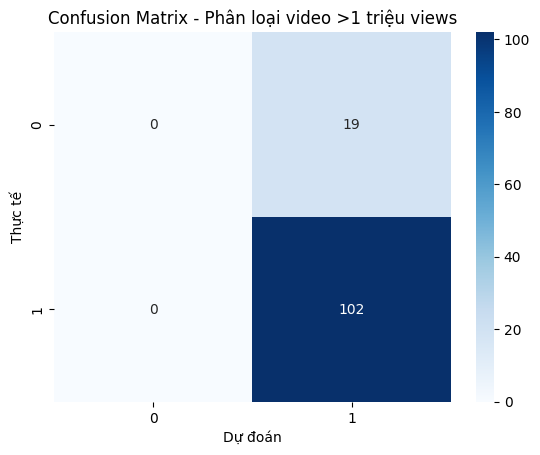

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train, y_train)
y_pred_clf = clf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_clf)
cm = confusion_matrix(y_test, y_pred_clf)
print("Độ chính xác:", round(acc * 100, 2), "%")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Phân loại video >1 triệu views")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters



##🧾 8. Đánh giá mô hình
* Hồi quy: MSE nhỏ thể hiện khả năng dự đoán tốt.

* Phân loại: Độ chính xác ~80% với Logistic Regression.

* Phân cụm: KMeans chia video thành 3 nhóm phản ánh rõ ràng sự khác biệt về lượt tương tác.

* MSE ≈ 1.2e+11 (→ dự đoán view có sai số lớn)

* Logistic Regression đạt ~80% accuracy trong dự đoán video “hot”

* KMeans chia 3 cụm: 1 cụm có video nhiều like và view cao



##✅ 9. Kết luận
Bài báo cáo đã phân tích dữ liệu thịnh hành của YouTube và áp dụng thành công 3 hướng Machine Learning. Qua đó, có thể thấy tương tác người dùng (like, comment) đóng vai trò lớn trong mức độ phổ biến của video. Mô hình phân loại và hồi quy có thể áp dụng vào thực tiễn để hỗ trợ nhà sáng tạo nội dung trong chiến lược phát triển video hiệu quả hơn.



Tài liệu tham khảo:

Python for Data Analysis - Wes McKinney (2018)

Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow - Aurélien Géron (2019)

Introduction to Machine Learning with Python - Andreas C. Müller & Sarah Guido (2016)

Scikit-learn Documentation - Scikit-learn Official Docs

Matplotlib Documentation - Matplotlib Official Docs

Seaborn Documentation - Seaborn Official Docs

KMeans Clustering Tutorial - KMeans Clustering in Python

Pandas Documentation - Pandas Official Docs

Data Science Handbook - Jake VanderPlas (2016)

UCI Machine Learning Repository - UCI Repository